Retos individuales

*   Hackathon: HACK THAT STARTUP
*   Author: Roger Serra



# Challenge 1


A)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataframe = pd.read_csv('/content/sample_data/Marketing.csv')
dataframe

,TV,Radio,Periodico,Redes Sociales,Email,Ingresos
0,230.1,37.8,69.2,151.81,25.85,22.1
1,44.5,39.3,45.1,47.49,55.98,10.4
2,17.2,45.9,69.3,35.76,133.43,9.3
3,151.5,41.3,58.5,109.25,33.17,18.5
4,180.8,10.8,58.4,108.57,8.71,12.9
...,...,...,...,...,...,...
195,38.2,3.7,13.8,23.74,3.23,7.6
196,94.2,4.9,8.1,56.16,1.06,9.7
197,177.0,9.3,6.4,105.57,0.85,12.8
198,283.6,42.0,66.2,184.51,22.60,25.5


In [ ]:
tv = round(dataframe['TV'].sum(), 2)
radio = round(dataframe['Radio'].sum(), 2)
periodico = round(dataframe['Periodico'].sum(), 2)
redes = round(dataframe['Redes Sociales'].sum(), 2)
email = round(dataframe['Email'].sum(), 2)

marketing_costs = {"TV": tv, "Radio": radio, "Periodico": periodico, "Redes Sociales": redes, "Email": email}
print(marketing_costs, "\n")
dataframe.describe()

{'TV': 29408.5, 'Radio': 4652.8, 'Periodico': 6110.8, 'Redes Sociales': 19301.35, 'Email': 3451.87} 



,TV,Radio,Periodico,Redes Sociales,Email,Ingresos
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,96.506750,17.259350,14.022500
std,85.854236,14.846809,21.778621,49.824942,26.584668,5.217457
min,0.700000,0.000000,0.300000,6.060000,0.000000,1.600000
25%,74.375000,9.975000,12.750000,51.357500,2.522500,10.375000
50%,149.750000,22.900000,25.750000,99.480000,8.160000,12.900000
75%,218.825000,36.525000,45.100000,137.872500,20.055000,17.400000
max,296.400000,49.600000,114.000000,188.530000,170.650000,27.000000


In [ ]:
# Lo primero que se puede observar en los ingresos es que siempre son positivos, ya que el mínimo es 1,6€
# También puede observarse, según la media, que el mayor % de los ingresos vienen relacionados con la Televisión y Redes Sociales
# En mi opinión, debería eliminarse la financiación de Radio y Periódico, ya que su coste medio es relativamente elevado para lo que aportan, y destinaría la financiación a TV y Redes Sociales que son las más importantes.


B)

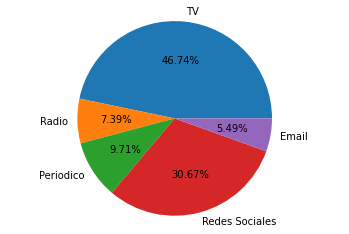

In [ ]:
# Con un piechart se visualizan mejor las proporciones para que el Sr. Juan pueda comprobar que los ingresos vienen en su mayoría por TV y Redes Sociales
labels_medios = []
sizes_costes = []
for medio, coste in marketing_costs.items():
    labels_medios.append(medio)
    sizes_costes.append(coste)

plt.pie(sizes_costes, labels=labels_medios, autopct='%1.2f%%')
plt.axis('equal')
plt.show()

# Challenge 2


A) 

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
# Aunque no aparece en el anunciado, he descubierto Seaborn, una librería para visualizar datos que me parecía interesante de utilizar
import seaborn as sns
%matplotlib inline

dataframe = pd.read_csv('/content/sample_data/Marketing.csv')
print(dataframe.shape)
dataframe.describe()

(200, 6)


,TV,Radio,Periodico,Redes Sociales,Email,Ingresos
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,96.506750,17.259350,14.022500
std,85.854236,14.846809,21.778621,49.824942,26.584668,5.217457
min,0.700000,0.000000,0.300000,6.060000,0.000000,1.600000
25%,74.375000,9.975000,12.750000,51.357500,2.522500,10.375000
50%,149.750000,22.900000,25.750000,99.480000,8.160000,12.900000
75%,218.825000,36.525000,45.100000,137.872500,20.055000,17.400000
max,296.400000,49.600000,114.000000,188.530000,170.650000,27.000000


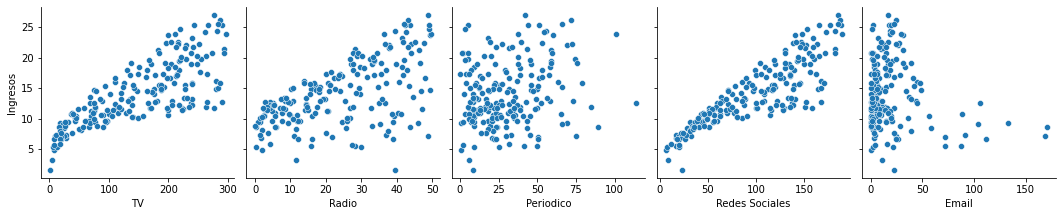

In [ ]:
sns.pairplot(dataframe, x_vars = ['TV', 'Radio', 'Periodico', 'Redes Sociales', 'Email'], y_vars = 'Ingresos', height = 3)


In [ ]:
# En este apartado se prepara el modelo

variables_predictoras = ['TV', 'Radio', 'Periodico', 'Redes Sociales', 'Email']
variable_a_predecir = 'Ingresos'
# Por convención los modelos se entrenan con X e Y
X = dataframe[variables_predictoras]
Y = dataframe[variable_a_predecir]

# La regla habitual es destinar un 80% de los datos a entrenar el modelo y el 20% restante a pruebas de testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)

# Creación del modelo
modelo_lineal = LinearRegression()
# Entrenamiento del mismo 
modelo_lineal.fit(x_train, y_train) 

print(modelo_lineal.score(x_test, y_test))  # Score del modelo
print(modelo_lineal.intercept_)


0.9452275835477029
3.084682045396818


In [ ]:
# Puesta a prueba del modelo, haciendo algunas predicciones
prediccion_y = modelo_lineal.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': prediccion_y})
print(df)

     Actual  Predicted
44      8.5   7.935695
111    21.8  21.205231
20     18.0  18.624996
129     9.7   8.354753
92     19.4  19.793757
120    15.5  15.001070
68     18.9  18.528544
104    20.7  20.011471
18     11.3  10.288985
108     5.3   4.448225
117     9.4   6.754242
172     7.6   7.627745
9      10.6  11.971439
91      7.3   5.473610
87     16.0  15.995943
69     22.3  21.412047
64     18.0  17.474185
45     14.9  15.289908
136     9.5  12.256493
55     23.7  21.879432
96     11.7  11.712459
21     12.5  14.148149
72      8.8  10.535290
17     24.4  23.574967
0      22.1  21.221280
138     9.6   9.947150
150    16.1  17.978531
169    15.0  16.555761
147    25.4  23.712704
48     14.8  16.559804
177    11.7  12.409273
195     7.6   5.600358
94     11.5  10.443551
10      8.6   7.387100
106     7.2   6.115444
127     8.8   6.552052
51     10.7   9.089294
93     22.2  21.929623
75      8.7   6.558895
3      18.5  18.112718


In [ ]:
# Tal y como está mencionado más arriba, la score es la siguiente:
print(modelo_lineal.score(x_test, y_test))  # Score del modelo


0.9452275835477029


B)

In [ ]:
# En una escala más reducida, y teniendo en cuenta sólo Redes Sociales y Email, el código se reduce bastante
dataframe_email_redes = pd.read_csv('/content/sample_data/Marketing.csv')
X = dataframe_email_redes[['Redes Sociales', 'Email']]
y = dataframe_email_redes['Ingresos']

modelo = LinearRegression()
modelo.fit(X, y)

#predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300cm3:
prediccion_marketing = modelo.predict([[500, 100]])
print(prediccion_marketing)

[54.36140839]


In [ ]:
# Con una inversión semanal únicamente de 500€ en redes y 100€ en Email se conseguirían unos beneficios de 54.36€ 